In [175]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
path = r'C:\Users\Administrator\Desktop\Data Science project\archive\UEFA Champions League 2016-2022 Data.xlsx'

In [177]:
goals = pd.read_excel(path, sheet_name = 'goals')
managers = pd.read_excel(path, sheet_name = 'managers')
matches = pd.read_excel(path, sheet_name = 'matches')
players = pd.read_excel(path, sheet_name = 'players')
stadiums = pd.read_excel(path, sheet_name = 'stadiums')
teams = pd.read_excel(path, sheet_name = 'teams')

In [178]:
# function for changing columns to lower case
def lower(df):
    df.columns = df.columns.str.lower()
    return df

In [179]:
# Applying function for every dataframe
goal = lower(goals)
match = lower(matches)
stadium = lower(stadiums)
player = lower(players)
manager = lower(managers)
team = lower(teams)

In [180]:
matches['result'] = 'D'  # Set default value as 'D' (draw)

# Update result based on home_team_score and away_team_score
matches.loc[matches['home_team_score'] > matches['away_team_score'], 'result'] = 'W'
matches.loc[matches['home_team_score'] < matches['away_team_score'], 'result'] = 'L'


In [181]:
matches['season'] = matches['season'].apply(lambda x: int(x.split('-')[0]))

In [182]:
match["date_time"] = pd.to_datetime(match["date_time"], format="%d-%b-%y %I.%M.%S.%f000000 %p")

In [183]:
match.dtypes

match_id                     object
season                        int64
date_time            datetime64[ns]
home_team                    object
away_team                    object
stadium                      object
home_team_score               int64
away_team_score               int64
penalty_shoot_out             int64
attendance                    int64
result                       object
dtype: object

In [184]:
matches.rename(columns={'home_team': 'team', 'away_team': 'opponent'}, inplace=True)


In [185]:
matches['opp_code'] = matches['opponent'].astype("category").cat.codes

In [186]:
matches["day_code"]=matches["date_time"].dt.dayofweek

In [187]:
matches['venue_code'] = np.where(matches['team']==matches['team'], 1, 0)


In [188]:
matches["target"] = matches["result"].map({"W": 1, "L": 2, "D": 0}).astype("int")


In [189]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=42)


In [316]:
train=matches[matches["date_time"]< '2020-01-01']

In [317]:
test=matches[matches["date_time"]> '2020-01-01']

In [318]:
predictors= ["venue_code", "opp_code", "day_code"]

In [319]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)

In [320]:
preds=rf.predict(test[predictors])

In [321]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)


Accuracy: 0.4652014652014652


In [322]:
result_df = pd.concat([test['target'], pd.Series(preds, name='predicted', index=test.index)], axis=1)
print(result_df)

     target  predicted
0         1          1
1         0          1
2         1          2
3         2          1
4         2          2
..      ...        ...
364       2          2
365       2          2
366       2          2
367       2          2
368       2          2

[273 rows x 2 columns]


In [323]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)


[[ 6 23 22]
 [12 64 42]
 [ 5 42 57]]


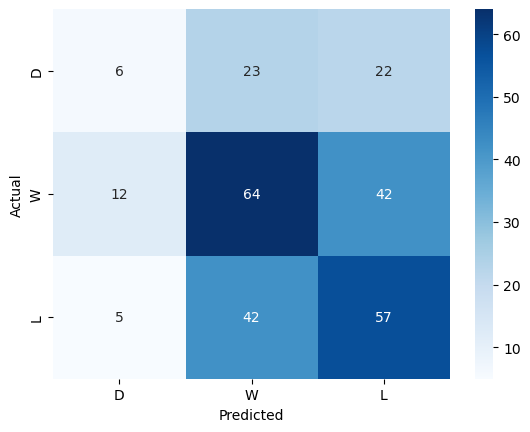

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [325]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [326]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,0,1,2
actual,,,
0,6,23,22
1,12,64,42
2,5,42,57


In [327]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted')
print("Precision Score: {:.2f}".format(precision))


Precision Score: 0.44


In [328]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))



F1 Score: 0.45


In [329]:
import joblib

filename = 'match_prediction_model_rf_test1.joblib'
joblib.dump(rf, filename)

['match_prediction_model_rf_test1.joblib']

In [330]:
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

In [331]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 9], 'learning_rate': [0.001, 0.01, 0.1, 1]}

# create a gradient boosting classifier
gbc = GradientBoostingClassifier()

# create the grid search object
gs = GridSearchCV(gbc, param_grid, cv=5)

In [332]:
# Fit the randomized search object to the data
gs.fit(train[predictors], train["target"])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7, 9]})

In [274]:
# extract the results of the grid search
results = gs.cv_results_


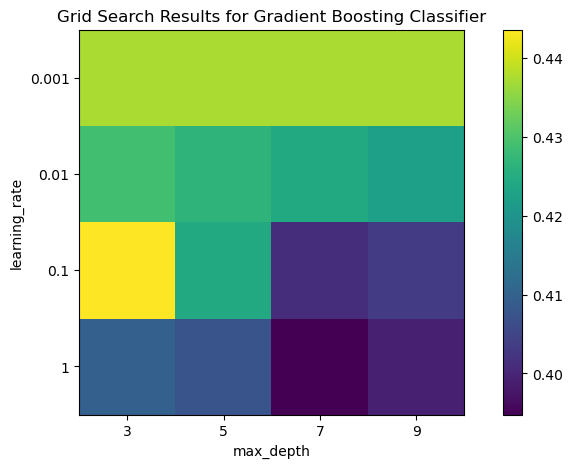

In [276]:
# plot the results of the grid search
plt.figure(figsize=(10, 5))
plt.title("Grid Search Results for Gradient Boosting Classifier")
plt.xlabel("max_depth")
plt.ylabel("learning_rate")
plt.imshow(results['mean_test_score'].reshape(4, 4), cmap='viridis', interpolation='nearest')
plt.xticks(range(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(range(len(param_grid['learning_rate'])), param_grid['learning_rate'])
plt.colorbar()
plt.show()